In [1]:
from __future__ import division

In [2]:
from shutil import copyfileobj
from six.moves import urllib
from sklearn.datasets.base import get_data_home
import os

def fetch_mnist(data_home=None):
    mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
    data_home = get_data_home(data_home=data_home)
    data_home = os.path.join(data_home, 'mldata')
    if not os.path.exists(data_home):
        os.makedirs(data_home)
    mnist_save_path = os.path.join(data_home, "mnist-original.mat")
    if not os.path.exists(mnist_save_path):
        mnist_url = urllib.request.urlopen(mnist_alternative_url)
        with open(mnist_save_path, "wb") as matlab_file:
            copyfileobj(mnist_url, matlab_file)


In [3]:
fetch_mnist()

In [4]:
from sklearn.datasets import fetch_mldata

In [5]:
minst = fetch_mldata('MNIST original')

In [6]:
minst

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [7]:
X, y = minst["data"], minst["target"]
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

In [9]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

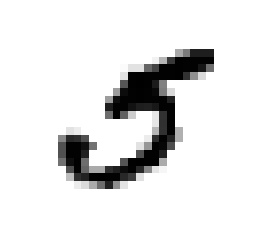

In [10]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [11]:
import numpy as np

In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000],y[60000:]

In [13]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

**Training a Binary Classifieer**

In [14]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [15]:
y_train_5

array([False, False, False, ..., False, False, False])

In [16]:
from sklearn.linear_model import SGDClassifier

In [17]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

/Users/peilinjiang/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

## performance Measures

**Measuring Accuarcy Using Cross-Validation**

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95915, 0.96455, 0.94675])

In [20]:
from sklearn.base import BaseEstimator

In [21]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

In [22]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90785, 0.9073 , 0.9138 ])

### Confusion Matrix

In [23]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53363,  1216],
       [ 1375,  4046]])

**Precision and Recall**

In [25]:
from sklearn.metrics import precision_score,recall_score

In [26]:
precision_score(y_train_5, y_train_pred)

0.7689091600152034

In [27]:
recall_score(y_train_5,y_train_pred)

0.7463567607452499

In [28]:
#To compute the F1 score
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.757465131517364

**Precision/Recall Tradeoff**

In [29]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([64542.01413248])

In [30]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [31]:
threshold = 200000
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([False])

In [32]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [33]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

**Plot precision and recall as functions of the threshold value**

In [34]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1],"b--", label="Precision")
    plt.plot(thresholds, recalls[:-1],"g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])

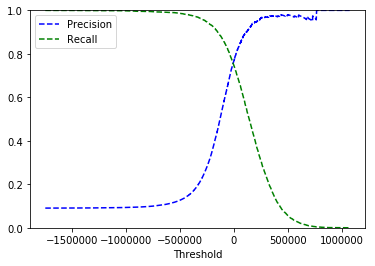

In [35]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [36]:
y_train_pred_90 = (y_scores>80000)

In [37]:
precision_score(y_train_5, y_train_pred_90)

0.8723237597911228

In [38]:
recall_score(y_train_5, y_train_pred_90)

0.6163069544364509

**The ROC Curve(the receiver operating charactersitc curve)**

In [39]:
from sklearn. metrics import roc_curve

In [40]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [41]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label= label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

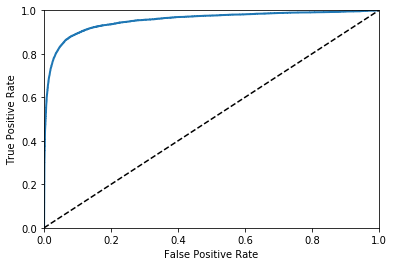

In [42]:
plot_roc_curve(fpr, tpr)
plt.show()

**One way to compare classifiers is to measure the area under the Curve(AUC)**

a perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5

In [43]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9537761636244451

In [44]:
from sklearn.ensemble import  RandomForestClassifier

In [45]:
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv =3, method="predict_proba")

# Muticlass Classification

In [46]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [47]:
sgd_clf.predict([some_digit])

array([5.])

In [48]:
some_digit_scores = sgd_clf.decision_function([some_digit])

In [49]:
some_digit_scores

array([[ -83394.32682506, -380290.74830786, -360156.42464351,
        -274651.27818168, -482075.29192098,   64542.01413248,
        -716915.76144408, -334558.8903286 , -823593.85635309,
        -604357.30368236]])

In [50]:
np.argmax(some_digit_scores)

5

In [51]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [52]:
sgd_clf.classes_[5]

5.0

In [53]:
cross_val_score(sgd_clf,X_train,y_train, cv=3, scoring="accuracy")

array([0.8644771 , 0.84974249, 0.8779817 ])

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()

In [56]:
X_train_scaler = scaler.fit_transform(X_train.astype(np.float64))

In [57]:
cross_val_score(sgd_clf, X_train_scaler, y_train, cv=3, scoring="accuracy")

array([0.90906819, 0.91269563, 0.90418563])

# Error Analysis

In [58]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaler, y_train, cv=3)

In [59]:
conf_mx = confusion_matrix(y_train, y_train_pred)

In [60]:
conf_mx

array([[5733,    2,   23,    9,   12,   45,   47,    9,   40,    3],
       [   2, 6458,   42,   29,    5,   39,    8,   12,  136,   11],
       [  58,   36, 5304,  111,   76,   22,   93,   62,  180,   16],
       [  42,   38,  143, 5338,    2,  227,   37,   59,  148,   97],
       [  16,   24,   38,   10, 5363,    8,   62,   32,   90,  199],
       [  75,   44,   32,  199,   74, 4557,  121,   32,  182,  105],
       [  27,   24,   46,    2,   38,   83, 5641,    9,   48,    0],
       [  22,   24,   71,   32,   51,   10,    5, 5799,   15,  236],
       [  57,  144,   75,  143,   15,  143,   64,   28, 5034,  148],
       [  43,   32,   25,   92,  150,   27,    3,  199,   86, 5292]])

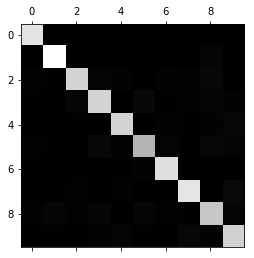

In [61]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [62]:
row_sums = conf_mx.sum(axis=1, keepdims = True)
norm_conf_mx = conf_mx/row_sums

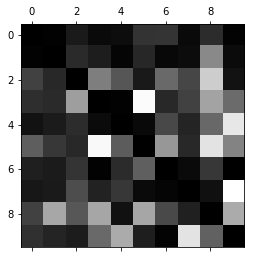

In [63]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()

In [64]:
cl_a, cl_b = 3,5

X_aa = X_train[(y_train==cl_a) & (y_train_pred==cl_a)]
X_ab = X_train[(y_train==cl_a) & (y_train_pred==cl_b)]
X_ba = X_train[(y_train==cl_b) & (y_train_pred==cl_a)]
X_bb = X_train[(y_train==cl_b) & (y_train_pred==cl_b)]

In [65]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

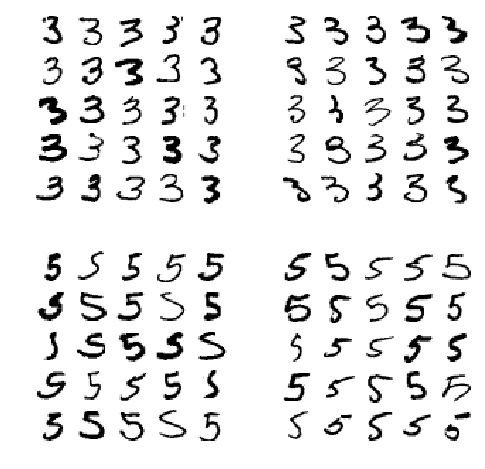

In [66]:
plt.figure(figsize=(8,8))
plt.subplot(221)
plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222)
plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223)
plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224)
plot_digits(X_bb[:25], images_per_row=5)
plt.show()

# Mutilabel Classification

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
y_train_large = (y_train>=7)
y_train_odd = (y_train %2 ==1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [69]:
knn_clf = KNeighborsClassifier()

In [70]:
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [71]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

# Multioutput Classification